# 請結合前面的知識與程式碼，比較不同的 optimizer 與 learning rate 組合對訓練的結果與影響
### 常見的 optimizer 包含
* SGD
* RMSprop
* AdaGrad
* Adam

In [20]:
import os
import keras
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [21]:
train, test = keras.datasets.cifar10.load_data()

In [22]:
def preproc_x(x, flatten = True):
  x = x / 255.0
  if flatten:
    x = x.reshape((len(x),-1))
  return x

def preproc_y(y, num_classes = 10):
  if y.shape[-1] == 1:
    y = keras.utils.to_categorical(y, num_classes)
  return y

In [23]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [24]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model


In [25]:
## 超參數設定
lrs = [1e-1, 5e-2, 1e-2, 1e-3]
opts = ['SGD', 'RMSprop', 'Adagrad', 'Adam']
epochs = 20
batch_size = 128



In [26]:
results = {}

for lr in lrs:
  for opt in opts:
    print(f"{opt} optimizer with {lr} learning rate")
    
    model = build_mlp(x_train.shape[1:])
    
    optimizer = None
    
    if opt == 'SGD':
      optimizer = keras.optimizers.SGD(lr = lr, momentum = 0.9, nesterov = True)
    elif opt == 'RMSprop':
      optimizer = keras.optimizers.RMSprop(lr = lr)
    elif opt == 'Adagrad':
      optimizer = keras.optimizers.Adagrad(lr = lr)
    else :
      optimizer = keras.optimizers.Adam(lr = lr, beta_1 = 0.9, beta_2 = 0.999)
    
    model.compile(optimizer = optimizer, loss = "categorical_crossentropy", metrics = ['accuracy'])
    
    history = model.fit(x_train, y_train, epochs = epochs, batch_size = batch_size, shuffle = True, validation_data = [x_test, y_test])
    
    name_tag = f"{str(opt)}_{str(lr)}"
    results[name_tag] = {'train_loss' : history.history['loss'],
                         'valid_loss' : history.history['val_loss'],
                         'train_acc'  : history.history['acc'],
                         'valid_acc'  : history.history['val_acc'] }

SGD optimizer with 0.1 learning rate
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 56s 1ms/step - loss: 2.3181 - acc: 0.1004 - val_loss: 2.3035 - val_acc: 0.1000
Epoch 2/20
50000/50000 [==============================] - 47s 948us/step - loss: 2.3042 - acc: 0.1016 - val_loss: 2.3051 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 50s 1000us/step - loss: 2.3042 - acc: 0.0986 - val_loss: 2.3057 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 50s 996us/step - loss: 2.3041 - acc: 0.1034 - val_loss: 2.3049 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 50s 997us/step - loss: 2.3044 - acc: 0.0987 - val_loss: 2.3045 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 50s 1ms/step - loss: 2.3044 - acc: 0.0991

Epoch 14/20
50000/50000 [==============================] - 68s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/20
50000/50000 [==============================] - 71s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/20
50000/50000 [==============================] - 69s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/20
50000/50000 [==============================] - 69s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 18/20
50000/50000 [==============================] - 68s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 19/20
50000/50000 [==============================] - 68s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 20/20
50000/50000 [==============================] - 68s 1ms/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Adam optimizer with 

50000/50000 [==============================] - 24s 473us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 11/20
50000/50000 [==============================] - 24s 489us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 12/20
50000/50000 [==============================] - 25s 496us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 13/20
50000/50000 [==============================] - 25s 496us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 14/20
50000/50000 [==============================] - 25s 492us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 15/20
50000/50000 [==============================] - 24s 487us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 16/20
50000/50000 [==============================] - 25s 495us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 17/20
50000/

50000/50000 [==============================] - 18s 356us/step - loss: 1.3725 - acc: 0.5123 - val_loss: 1.4149 - val_acc: 0.4967
Epoch 7/20
50000/50000 [==============================] - 18s 358us/step - loss: 1.3384 - acc: 0.5253 - val_loss: 1.3898 - val_acc: 0.5080
Epoch 8/20
50000/50000 [==============================] - 17s 331us/step - loss: 1.3091 - acc: 0.5371 - val_loss: 1.3787 - val_acc: 0.5083
Epoch 9/20
50000/50000 [==============================] - 16s 328us/step - loss: 1.2742 - acc: 0.5485 - val_loss: 1.4439 - val_acc: 0.4949
Epoch 10/20
50000/50000 [==============================] - 18s 360us/step - loss: 1.2432 - acc: 0.5572 - val_loss: 1.3810 - val_acc: 0.5049
Epoch 11/20
50000/50000 [==============================] - 18s 359us/step - loss: 1.2176 - acc: 0.5691 - val_loss: 1.3292 - val_acc: 0.5316
Epoch 12/20
50000/50000 [==============================] - 18s 354us/step - loss: 1.1905 - acc: 0.5766 - val_loss: 1.3441 - val_acc: 0.5225
Epoch 13/20
50000/50000 [==========

50000/50000 [==============================] - 29s 581us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 3/20
50000/50000 [==============================] - 34s 672us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 4/20
50000/50000 [==============================] - 30s 591us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 5/20
50000/50000 [==============================] - 31s 624us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 6/20
50000/50000 [==============================] - 30s 592us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 7/20
50000/50000 [==============================] - 30s 591us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 8/20
50000/50000 [==============================] - 31s 611us/step - loss: 14.5063 - acc: 0.1000 - val_loss: 14.5063 - val_acc: 0.1000
Epoch 9/20
50000/50000 [

50000/50000 [==============================] - 25s 502us/step - loss: 1.2374 - acc: 0.5584 - val_loss: 1.5134 - val_acc: 0.4849
Epoch 20/20
50000/50000 [==============================] - 25s 503us/step - loss: 1.2216 - acc: 0.5641 - val_loss: 1.5096 - val_acc: 0.4808
Adagrad optimizer with 0.001 learning rate
Train on 50000 samples, validate on 10000 samples
Epoch 1/20
50000/50000 [==============================] - 23s 458us/step - loss: 1.9520 - acc: 0.3013 - val_loss: 1.8348 - val_acc: 0.3448
Epoch 2/20
50000/50000 [==============================] - 23s 460us/step - loss: 1.7638 - acc: 0.3767 - val_loss: 1.7189 - val_acc: 0.3945
Epoch 3/20
50000/50000 [==============================] - 22s 446us/step - loss: 1.6915 - acc: 0.4042 - val_loss: 1.6755 - val_acc: 0.4121
Epoch 4/20
50000/50000 [==============================] - 22s 446us/step - loss: 1.6450 - acc: 0.4220 - val_loss: 1.6457 - val_acc: 0.4141
Epoch 5/20
50000/50000 [==============================] - 23s 457us/step - loss: 1.

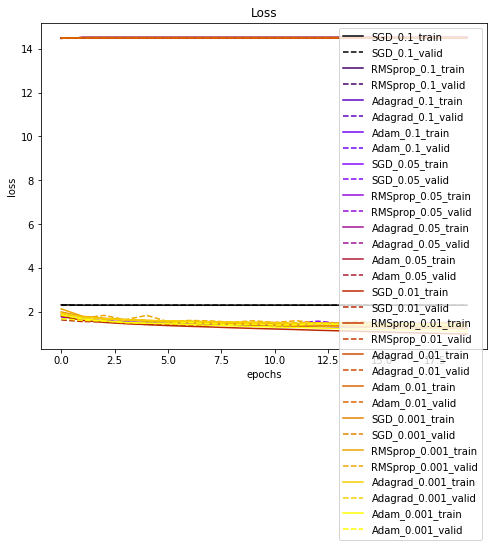

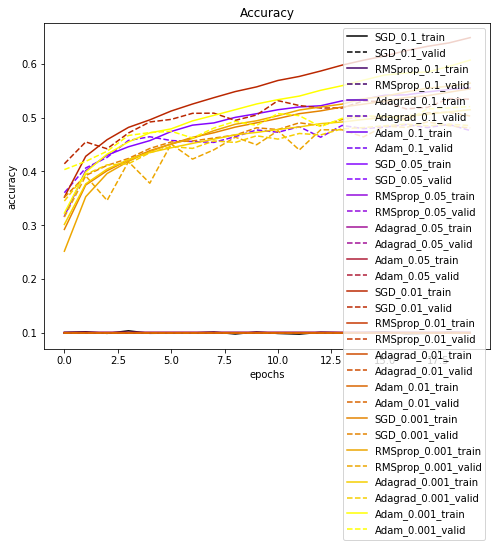

In [28]:
import matplotlib.pyplot as plt
import numpy as np
cmap = plt.get_cmap('gnuplot')
colors = [cmap(i) for i in np.linspace(0, 1, len(results))]

plt.figure(figsize = (8,6))

for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_loss'], '-', label = cond + "_train", color = colors[i])
  plt.plot(results[cond]['valid_loss'],'--', label = cond + "_valid", color = colors[i])

plt.xlabel("epochs")
plt.ylabel('loss')
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize = (8,6))
for i, cond in enumerate(results.keys()):
  plt.plot(results[cond]['train_acc'], '-', label = cond + "_train", color = colors[i])
  plt.plot(results[cond]['valid_acc'], '--',label = cond + "_valid", color = colors[i])

plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy")
plt.legend()
plt.show()